# Preparation and Exploration

In [1]:
# importing libraries
import numpy as np            # data science essentials
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from sklearn.metrics import roc_auc_score # roc_auc_score
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from sklearn.neighbors import KNeighborsRegressor # KNN Regression
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.ensemble import GradientBoostingClassifier # Gradient Bossting Regression
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor
from sklearn.model_selection import GridSearchCV # CV using Grid Search
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
original_df = pd.read_excel(file)

In [2]:
# creating a dropped dataset 
original_df = original_df.dropna()

original_df.isnull().sum().sum()

original_df.to_excel("A1_original_df_wo_na.xlsx", index = False)

In [3]:
# splitting emails

# safety measure in case of multiple concatenations
original_df = pd.read_excel('A1_original_df_wo_na.xlsx')

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [4]:
# concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain 
original_df = pd.concat([original_df, email_df['email_domain']],
                     axis = 1)

In [5]:
# email domain types
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']
prof_email_domains  = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['email_domain']:
    
    if '@' + str(domain) in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + str(domain) in junk_email_domains:
        placeholder_lst.append('junk')
        
        
    elif '@' + str(domain) in prof_email_domains:
        placeholder_lst.append('professional')


    else:
        print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        845
professional    678
junk            376
Name: domain_group, dtype: int64

In [6]:
# get dummies for domain group
dummies = pd.get_dummies(original_df['domain_group'])

# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, dummies],
                     axis = 1)

# dropping categorical variables after they've been encoded
original_df = original_df.drop('domain_group', axis = 1)

# verifying
original_df.head()

# converting the dummies 
original_df['junk'] = np.int64(original_df['junk'])
original_df['personal'] = np.int64(original_df['personal'])
original_df['professional'] = np.int64(original_df['professional'])

In [7]:
# Outlier threshholds
REVENUE_HI = 5000
TOTAL_MEALS_ORDERED_HI = 200
UNIQUE_MEALS_PURCH_HI = 9
CONTACTS_W_CUSTOMER_SERVICE_HI = 10.5   
CONTACTS_W_CUSTOMER_SERVICE_LOW = 2.5    
AVG_TIME_PER_SITE_VISIT_HI = 225
CANCELLATIONS_BEFORE_NOON_HI = 5        
CANCELLATIONS_AFTER_NOON_HI = 1.5        
MOBILE_LOGINS_HI = 6.5
MOBILE_LOGINS_LOW = 4.5
PC_LOGINS_HI = 2.5
PC_LOGINS_LOW = 0.5
WEEKLY_PLAN_HI = 18
EARLY_DELIVERIES_HI = 5
LATE_DELIVERIES_HI = 8
AVG_PREP_VID_TIME_HI =250
MASTER_CLASSES_ATTENDED_HI = 1.5
MEDIAN_MEAL_RATING_HI = 4
AVG_CLICKS_PER_VISIT_LOW = 9
AVG_CLICKS_PER_VISIT_HI = 18
TOTAL_PHOTOS_VIEWED_HI =300

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

for index, value in original_df.iterrows():
   
    # REVENUE
    if original_df.loc[index, 'REVENUE'] > REVENUE_HI:
        original_df.loc[index, 'out_REVENUE'] = 1
    else:
        original_df.loc[index, 'out_REVENUE'] = 0
    
    # TOTAL MEALS ORDERED
    if original_df.loc[index, 'TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI:
        original_df.loc[index, 'out_TOTAL_MEALS_ORDERED'] = 1
    else:
        original_df.loc[index,'out_TOTAL_MEALS_ORDERED']= 0
    
     # Unique Meals Purchase
    if original_df.loc[index, 'UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI:
        original_df.loc[index, 'out_UNIQUE_MEALS_PURCH'] = 1
    else:
        original_df.loc[index,'out_UNIQUE_MEALS_PURCH']= 0
    
     # AVERAGE TIME PER SITE VISIT
    if original_df.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI:
        original_df.loc[index, 'out_AVG_TIME_PER_SITE_VISIT'] = 1
    else:
        original_df.loc[index,'out_AVG_TIME_PER_SITE_VISIT']= 0
    
    # CONTACTS WITH CUSTOMER SERVICE
    if original_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI:
        original_df.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] = 1
    else:
        original_df.loc[index,'out_CONTACTS_W_CUSTOMER_SERVICE']= 0
    
    #CONTACTS WITH CUSTOMER SERVICE
    if original_df.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_LOW:
        original_df.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] = 1
    else:
        original_df.loc[index,'out_CONTACTS_W_CUSTOMER_SERVICE']= 0
    
    # CANCELLATIONS BEFORE NOON
    if original_df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI:
        original_df.loc[index, 'out_CANCELLATIONS_BEFORE_NOON'] = 1
    else:
        original_df.loc[index,'out_CANCELLATIONS_BEFORE_NOON']= 0  
    
    #CANCELLATIONS_AFTER_NOON
    if original_df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI:
        original_df.loc[index, 'out_CANCELLATIONS_AFTER_NOON'] = 1
    else:
        original_df.loc[index,'out_CANCELLATIONS_AFTER_NOON']= 0  
    
    #MOBILE LOGINS
    if original_df.loc[index, 'MOBILE_LOGINS'] > MOBILE_LOGINS_HI:
        original_df.loc[index, 'out_MOBILE_LOGINS'] = 1
    else:
        original_df.loc[index,'out_MOBILE_LOGINS']= 0  

    #MOBILE LOGINS
    if original_df.loc[index, 'MOBILE_LOGINS'] > MOBILE_LOGINS_LOW:
        original_df.loc[index, 'out_MOBILE_LOGINS'] = 1
    else:
        original_df.loc[index,'out_MOBILE_LOGINS']= 0
    
     #PC LOGINS
    if original_df.loc[index, 'PC_LOGINS'] > PC_LOGINS_HI:
        original_df.loc[index, 'out_PC_LOGINS'] = 1
    else:
        original_df.loc[index,'out_PC_LOGINS']= 0  
    
    #PC LOGINS
    if original_df.loc[index, 'PC_LOGINS'] > PC_LOGINS_LOW:
        original_df.loc[index, 'out_PC_LOGINS'] = 1
    else:
        original_df.loc[index,'out_PC_LOGINS']= 0  
    
    #WEEKLY PLAN
    if original_df.loc[index, 'WEEKLY_PLAN'] > WEEKLY_PLAN_HI:
        original_df.loc[index, 'out_WEEKLY_PLAN'] = 1
    else:
        original_df.loc[index,'out_WEEKLY_PLAN']= 0
    
     #WEEKLY PLAN
    if original_df.loc[index, 'EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI:
        original_df.loc[index, 'out_EARLY_DELIVERIES'] = 1
    else:
        original_df.loc[index,'out_EARLY_DELIVERIES']= 0
    
    #WEEKLY PLAN
    if original_df.loc[index, 'LATE_DELIVERIES'] > LATE_DELIVERIES_HI:
        original_df.loc[index, 'out_LATE_DELIVERIES'] = 1
    else:
        original_df.loc[index,'out_LATE_DELIVERIES']= 0
    
    #AVG_PREP_VID_TIME
    if original_df.loc[index, 'AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI:
        original_df.loc[index, 'out_AVG_PREP_VID_TIME'] = 1
    else:
        original_df.loc[index,'out_AVG_PREP_VID_TIME']= 0
    
    #MASTER_CLASSES_ATTENDED
    if original_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI:
        original_df.loc[index, 'out_MASTER_CLASSES_ATTENDED'] = 1
    else:
        original_df.loc[index,'out_MASTER_CLASSES_ATTENDED']= 0
    
    #MEDIAN_MEAL_RATING
    if original_df.loc[index, 'MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_HI:
        original_df.loc[index, 'out_MEDIAN_MEAL_RATING'] = 1
    else:
        original_df.loc[index,'out_MEDIAN_MEAL_RATING']= 0
    
    #AVG_CLICKS_PER_VISIT
    if original_df.loc[index, 'AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_LOW:
        original_df.loc[index, 'out_AVG_CLICKS_PER_VISIT'] = 1
    else:
        original_df.loc[index,'out_AVG_CLICKS_PER_VISIT']= 0
    
    #AVG_CLICKS_PER_VISIT
    if original_df.loc[index, 'AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI:
        original_df.loc[index, 'out_AVG_CLICKS_PER_VISIT'] = 1
    else:
        original_df.loc[index,'out_AVG_CLICKS_PER_VISIT']= 0
    
    #AVG_CLICKS_PER_VISIT
    if original_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI:
        original_df.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] = 1
    else:
        original_df.loc[index,'out_TOTAL_PHOTOS_VIEWED']= 0
    
    #AVG_CLICKS_PER_VISIT
    if original_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_HI:
        original_df.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] = 1
    else:
        original_df.loc[index,'out_TOTAL_PHOTOS_VIEWED']= 0

In [8]:
# saving feature-rich dataset in Excel
original_df.to_excel('original_df_feature_rich.xlsx',
                 index = False)

# Logistic Regression

In [9]:
df_corr = original_df.corr(method= 'pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
professional                       0.20
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
out_CANCELLATIONS_BEFORE_NOON      0.06
out_CONTACTS_W_CUSTOMER_SERVICE    0.05
out_AVG_PREP_VID_TIME              0.05
PACKAGE_LOCKER                     0.04
personal                           0.04
MASTER_CLASSES_ATTENDED            0.04
PC_LOGINS                          0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
out_MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME                  0.03
MEDIAN_MEAL_RATING                 0.03
out_EARLY_DELIVERIES               0.02
EARLY_DELIVERIES                   0.02
out_LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE                 0.02
REVENUE                            0.01
AVG_TIME_PER_SITE_VISIT            0.01
TOTAL_MEALS_ORDERED                0.01
LATE_DELIVERIES                    0.00


In [10]:
# declaring explanatory variables
original_df_data = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
original_df_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [11]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = original_df_target)


# merging training data for statsmodels
original_df_train = pd.concat([x_train, y_train], axis = 1)

In [12]:
for val in original_df:
    print(f" {val} + ")

 REVENUE + 
 CROSS_SELL_SUCCESS + 
 NAME + 
 EMAIL + 
 FIRST_NAME + 
 FAMILY_NAME + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 email_domain + 
 junk + 
 personal + 
 professional + 
 out_REVENUE + 
 out_TOTAL_MEALS_ORDERED + 
 out_UNIQUE_MEALS_PURCH + 
 out_AVG_TIME_PER_SITE_VISIT + 
 out_CONTACTS_W_CUSTOMER_SERVICE + 
 out_CANCELLATIONS_BEFORE_NOON + 
 out_CANCELLATIONS_AFTER_NOON + 
 out_MOBILE_LOGINS + 
 out_PC_LOGINS + 
 out_WEEKLY_PLAN + 
 out_EARLY_DELIVERIES + 
 out_LATE_DELIVERIES + 
 out_AVG_PREP_VID_TIME + 


In [13]:
# instantiating a logistic regression model object - BASE MODEL
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~REVENUE + 
                                                     TOTAL_MEALS_ORDERED + 
                                                     UNIQUE_MEALS_PURCH + 
                                                     CONTACTS_W_CUSTOMER_SERVICE + 
                                                     PRODUCT_CATEGORIES_VIEWED + 
                                                     AVG_TIME_PER_SITE_VISIT + 
                                                     MOBILE_NUMBER + 
                                                     CANCELLATIONS_BEFORE_NOON + 
                                                     CANCELLATIONS_AFTER_NOON + 
                                                     TASTES_AND_PREFERENCES + 
                                                     PC_LOGINS + 
                                                     MOBILE_LOGINS + 
                                                     WEEKLY_PLAN + 
                                                     EARLY_DELIVERIES + 
                                                     LATE_DELIVERIES + 
                                                     PACKAGE_LOCKER + 
                                                     REFRIGERATED_LOCKER + 
                                                     AVG_PREP_VID_TIME + 
                                                     LARGEST_ORDER_SIZE + 
                                                     MASTER_CLASSES_ATTENDED + 
                                                     MEDIAN_MEAL_RATING + 
                                                     AVG_CLICKS_PER_VISIT + 
                                                     TOTAL_PHOTOS_VIEWED + 
                                                     out_REVENUE + 
                                                     out_TOTAL_MEALS_ORDERED + 
                                                     out_UNIQUE_MEALS_PURCH + 
                                                     out_AVG_TIME_PER_SITE_VISIT + 
                                                     out_CONTACTS_W_CUSTOMER_SERVICE + 
                                                     out_CANCELLATIONS_BEFORE_NOON + 
                                                     out_CANCELLATIONS_AFTER_NOON + 
                                                     out_WEEKLY_PLAN + 
                                                     out_EARLY_DELIVERIES + 
                                                     out_LATE_DELIVERIES + 
                                                     out_AVG_PREP_VID_TIME + 
                                                     out_MASTER_CLASSES_ATTENDED + 
                                                     out_MEDIAN_MEAL_RATING + 
                                                     out_AVG_CLICKS_PER_VISIT + 
                                                     out_TOTAL_PHOTOS_VIEWED""",
                                                        data   = original_df)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.586223
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1899
Model:                          Logit   Df Residuals:                     1860
Method:                           MLE   Df Model:                           38
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                 0.06737
Time:                        22:48:03   Log-Likelihood:                -1113.2
converged:                       True   LL-Null:                       -1193.7
Covariance Type:            nonrobust   LLR p-value:                 4.695e-17
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.5981      1.335     -1.946      0.052      -5.215       0.019
REVENUE                            -0.0002   8.81e-05     -1.837      0.066      -0.000    1.09e-05
TOTAL_MEALS_ORDERED                 0.0043      0.002      2.655      0.008       0.001       0.008
UNIQUE_MEALS_PURCH                 -0.0008      0.022     -0.036      0.971      -0.045       0.043
CONTACTS_W_CUSTOMER_SERVICE         0.0437      0.024      1.820      0.069      -0.003       0.091
PRODUCT_CATEGORIES_VIEWED           0.0010      0.017      0.061      0.951      -0.032       0.035
AVG_TIME_PER_SITE_VISIT             0.0011      0.001      0.945      0.345      -0.001       0.003
MOBILE_NUMBER                       0.6755      0.151      4.471      0.000       0.379       0.972
CANCELLATIONS_BEFORE_NOON           0.3005      0.043      6.911      0.000       0.215       0.386
CANCELLATIONS_AFTER_NOON           -0.2060      0.155     -1.326      0.185      -0.511       0.098
TASTES_AND_PREFERENCES              0.4416      0.113      3.922      0.000       0.221       0.662
PC_LOGINS                           0.2009      0.090      2.235      0.025       0.025       0.377
MOBILE_LOGINS                      -0.1809      0.098     -1.841      0.066      -0.373       0.012
WEEKLY_PLAN                        -0.0001      0.008     -0.016      0.987      -0.016       0.016
EARLY_DELIVERIES                    0.0054      0.036      0.152      0.879      -0.064       0.075
LATE_DELIVERIES                     0.0015      0.025      0.062      0.950      -0.047       0.050
PACKAGE_LOCKER                      0.0381      0.123      0.310      0.757      -0.203       0.279
REFRIGERATED_LOCKER                 0.4719      0.199      2.376      0.017       0.083       0.861
AVG_PREP_VID_TIME                  -0.0008      0.002     -0.336      0.737      -0.006       0.004
LARGEST_ORDER_SIZE                 -0.0004      0.058     -0.007      0.994      -0.113       0.113
MASTER_CLASSES_ATTENDED             0.1549      0.124      1.250      0.211      -0.088       0.398
MEDIAN_MEAL_RATING                 -0.0573      0.145     -0.396      0.692      -0.341       0.227
AVG_CLICKS_PER_VISIT               -0.0346      0.043     -0.799      0.425      -0.120       0.050
TOTAL_PHOTOS_VIEWED                 0.0001      0.001      0.207      0.836      -0.001       0.001
out_REVENUE                         0.3200      0.415      0.771      0.441      -0.494       1.134
out_TOTAL_MEALS_ORDERED            -1.4216      0.387     -3.670      0.000      -2.181      -0.662
out_UNIQUE_MEALS_PURCH              0.1016      0.595      0.171      0.865      -1.066       1.269
out_AVG_TIME_PER_SITE_VISIT        -0.4048      0.465     -0.870      0.384      -1.317       0.507
out_CONTACTS_W_CUSTOMER_SERVICE     1.5072      0.739      2.038      0.042       0.058       2.956
out_CANCELLATIONS_BEFORE_NOON      -0.600

In [14]:
# declaring set of x-variables (NEW)
x_var = ['TOTAL_MEALS_ORDERED','MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
         'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'REFRIGERATED_LOCKER', 
         'out_TOTAL_MEALS_ORDERED', 'out_CONTACTS_W_CUSTOMER_SERVICE',
         'out_AVG_PREP_VID_TIME', 'out_AVG_CLICKS_PER_VISIT']

In [15]:
# train/test split with the full model
original_df_data   =  original_df.loc[ : , x_var]
original_df_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = original_df_target)


# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

Training ACCURACY: 0.6917
Testing  ACCURACY: 0.6968


C:\Users\mccah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5482787317825681

In [16]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(x_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(x_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6917, 0.6968, 0.5483]


In [17]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 20 133]
 [ 11 311]]


In [18]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 20
False Positives: 133
False Negatives: 11
True Positives : 311



In [19]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5483


# CART Models

In [20]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [21]:
#INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9249
Full Tree Testing ACCURACY : 0.5347
Full Tree AUC Score: 0.5059


In [22]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 65
False Positives: 88
False Negatives: 133
True Positives : 189



In [23]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)

# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.6931
Testing  ACCURACY: 0.6779
AUC Score        : 0.5377


In [24]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")



True Negatives : 22
False Positives: 131
False Negatives: 22
True Positives : 300



# Hyperparameter Tuning

In [25]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [26]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [27]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.6917
Testing  ACCURACY: 0.6968
AUC Score        : 0.5483


C:\Users\mccah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.5483         (20, 133, 11, 311)
Full Tree     0.5059         (65, 88, 133, 189)
Pruned Tree   0.5377         (22, 131, 22, 300)



# Hyperparameter Tuning with RandomizedSearchCV

########################################
#RandomizedSearchCV
########################################

#declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


#creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


#INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


#GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


#FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_df_data, original_df_target)


#PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

#checking the best estimator for the model
lr_tuned_cv.best_estimator_

In [29]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C=4.9, max_iter=1000, random_state=219, warm_start=True)


# FIT step is not needed
lr_tuned_fit=lr_tuned.fit(original_df_data, original_df_target)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.6903
Testing  ACCURACY: 0.7095
AUC Score        : 0.5747


In [30]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 30
False Positives: 123
False Negatives: 15
True Positives : 307



In [31]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Score'          : lr_auc,
                          'Confusion Matrix'   : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"


#declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


#creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


#INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


#RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


#FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_df_data, original_df_target)


#PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

#best estimators based on RandomizedSearchCV
tuned_tree_cv.best_estimator_

In [32]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=42,
                       random_state=219)

# FIT step is not needed
tuned_tuned_fit=tree_tuned.fit(original_df_data, original_df_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.6945
Testing  ACCURACY: 0.7032
AUC Score        : 0.5735


In [33]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 32
False Positives: 121
False Negatives: 20
True Positives : 302



In [34]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"


# Random Forest

In [35]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

In [36]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [37]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9249
Testing  ACCURACY: 0.6
AUC Score        : 0.5317


In [38]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 52
False Positives: 101
False Negatives: 89
True Positives : 233



In [39]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"


#FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


#PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


#Declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


#Creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


#INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


#GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


#FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(original_df_data, original_df_target)


#printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

#checking the best estimator for the model
forest_cv.best_estimator_

In [40]:
# building a model based on hyperparameter tuning results
forest_tuned = RandomForestClassifier(criterion='entropy', n_estimators=350, random_state=219,
                       warm_start=True)

# FIT step is not needed
forest_tuned_fit=tree_tuned.fit(original_df_data, original_df_target)

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion='entropy',
                                      min_samples_leaf=11,
                                      n_estimators=350,
                                      random_state=219, 
                                      warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7001
Forest Tuned Testing  ACCURACY: 0.6968
Forest Tuned AUC Score        : 0.538


In [41]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 14
False Positives: 139
False Negatives: 5
True Positives : 317



In [42]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"
6,Tuned Random Forest (Full),0.5380,0.7001,0.6968,"(14, 139, 5, 317)"


# Gradient Boosted Machines

In [43]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.7331
Testing ACCURACY : 0.6821
AUC Score        : 0.546


In [44]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 25
False Positives: 128
False Negatives: 23
True Positives : 299



In [45]:
# SCORING the model
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  =y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"
6,Tuned Random Forest (Full),0.5380,0.7001,0.6968,"(14, 139, 5, 317)"
7,GBM (Full),0.5460,0.7331,0.6821,"(25, 128, 23, 299)"


#Declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 25)
depth_space        = pd.np.arange(1, 20, 2)
warm_start_space   = [True, False]

#Creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}
#INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


#GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


#FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(original_df_data, original_df_target)

#PREDICT step is not needed


#printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

#checking the best estimator for the model
 full_gbm_cv.best_estimator_

In [46]:
# INSTANTIATING the model object without hyperparameters

gbm_tuned = GradientBoostingClassifier(learning_rate=0.7000000000000001, n_estimators=125,
                           random_state=219, warm_start=True)
# FIT step is not needed
gbm_tuned_fit = gbm_tuned.fit(original_df_data, original_df_target)

# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8111
Testing  ACCURACY: 0.8168
AUC Score        : 0.75


In [47]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 86
False Positives: 67
False Negatives: 20
True Positives : 302



In [48]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"
6,Tuned Random Forest (Full),0.5380,0.7001,0.6968,"(14, 139, 5, 317)"
7,GBM (Full),0.5460,0.7331,0.6821,"(25, 128, 23, 299)"
8,Tuned GBM,0.7500,0.8111,0.8168,"(86, 67, 20, 302)"


# KNN- Final & Best Model

In [49]:
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

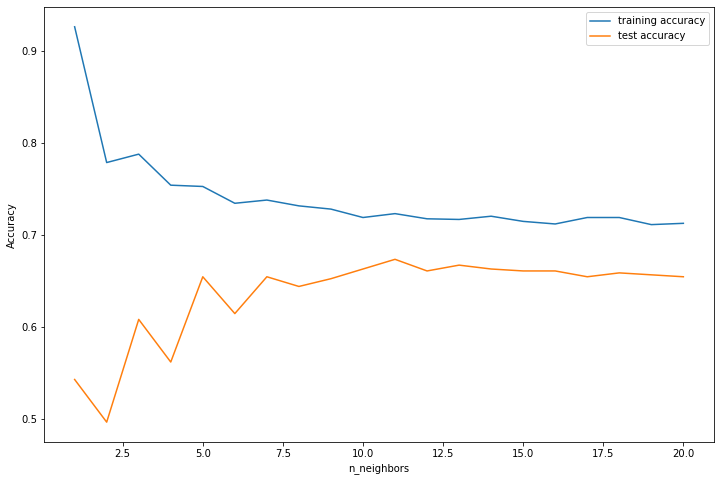

The optimal number of neighbors is: 11


In [50]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = original_df_data,
                                  y_data        = original_df_target,
                                  response_type = 'class')

In [51]:
# preparing explanatory variable data
original_df_clean   = original_df.drop(['NAME', 'FIRST_NAME', 'FAMILY_NAME','EMAIL','personal','email_domain'],
                     axis = 1)

In [52]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_df_clean)


# TRANSFORMING the data
x_scaled     = scaler.transform(original_df_clean)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            original_df_target,
            random_state = 219,
            test_size = 0.25,
            stratify = original_df_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.9171
Testing  ACCURACY: 0.8884
AUC Score        : 0.8337


In [53]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 104
False Positives: 49
False Negatives: 4
True Positives : 318



In [54]:
# declaring model performance objects
knn_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_acc  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned KNN',
                          'Training Accuracy'  : knn_train_acc,
                          'Testing Accuracy'   : knn_test_acc,
                          'AUC Score'          : knn_auc,
                          'Confusion Matrix'   :(knn_tree_tn, 
                                                knn_tree_fp, 
                                                knn_tree_fn, 
                                                knn_tree_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"
6,Tuned Random Forest (Full),0.5380,0.7001,0.6968,"(14, 139, 5, 317)"
7,GBM (Full),0.5460,0.7331,0.6821,"(25, 128, 23, 299)"
8,Tuned GBM,0.7500,0.8111,0.8168,"(86, 67, 20, 302)"
9,Tuned KNN,0.8337,0.9171,0.8884,"(104, 49, 4, 318)"


# Model Output

In [55]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
9,Tuned KNN,0.8337,0.9171,0.8884,"(104, 49, 4, 318)"
8,Tuned GBM,0.7500,0.8111,0.8168,"(86, 67, 20, 302)"
3,Tuned LR,0.5747,0.6903,0.7095,"(30, 123, 15, 307)"
4,Tuned Tree,0.5735,0.6945,0.7032,"(32, 121, 20, 302)"
0,Logistic,0.5483,0.6917,0.6968,"(20, 133, 11, 311)"
7,GBM (Full),0.5460,0.7331,0.6821,"(25, 128, 23, 299)"
6,Tuned Random Forest (Full),0.5380,0.7001,0.6968,"(14, 139, 5, 317)"
2,Pruned Tree,0.5377,0.6931,0.6779,"(22, 131, 22, 300)"
5,Random Forest (Full),0.5317,0.9249,0.6000,"(52, 101, 89, 233)"
1,Full Tree,0.5059,0.9249,0.5347,"(65, 88, 133, 189)"
